In [1]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
train = pd.read_csv("Titanic/train.csv")
test = pd.read_csv("Titanic/test.csv")
submit = pd.read_csv('Titanic/gender_submission.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
pd.options.display.max_rows = 891
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [5]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df = train.append(test)
pd.options.display.max_rows = 1309
df

/var/folders/4t/yv8q1_017m726db87cx1327m0000gn/T/ipykernel_46849/3401168200.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [11]:
df.reset_index(inplace=True, drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: xlabel='Survived', ylabel='count'>

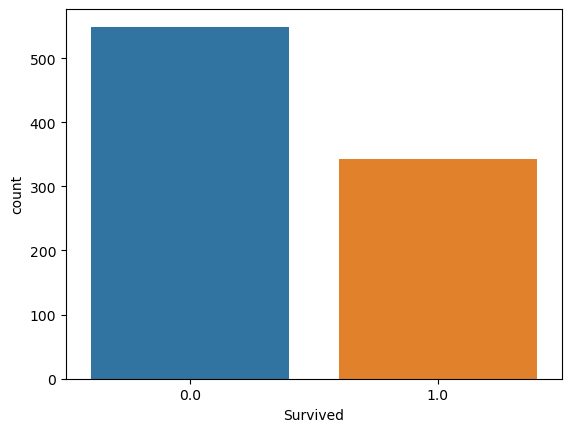

In [13]:
sns.countplot(data=df,x=df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

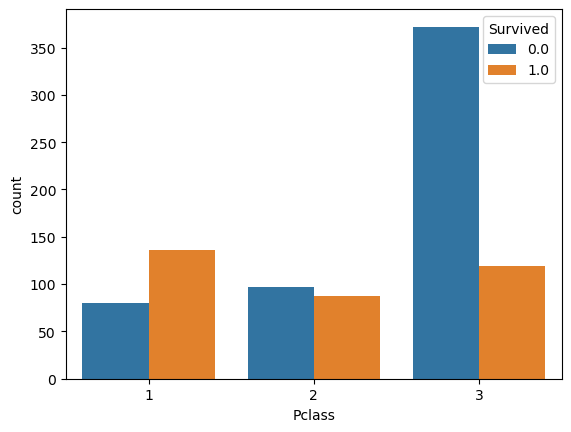

In [14]:
sns.countplot(data=df,x=df["Pclass"], hue=df['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

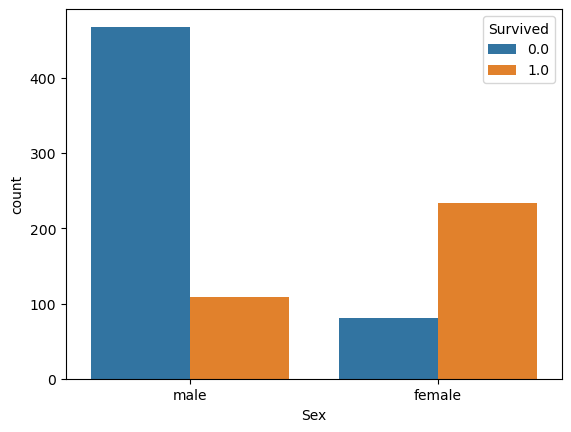

In [15]:
sns.countplot(data=df,x=df['Sex'], hue=df['Survived'])

<Axes: xlabel='Embarked', ylabel='count'>

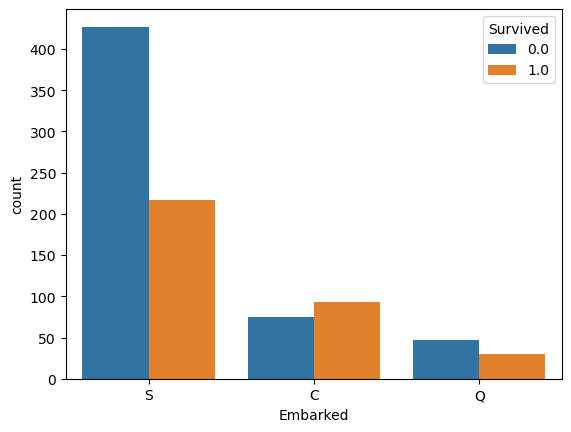

In [16]:
sns.countplot(data=df,x=df['Embarked'], hue=df['Survived'])

g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)


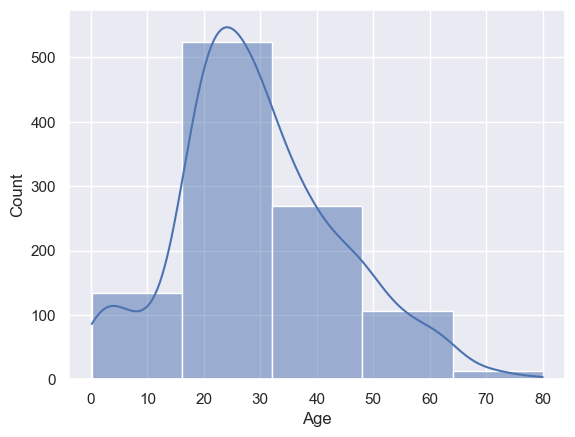

/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


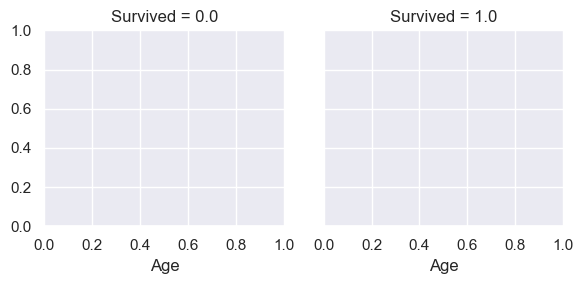

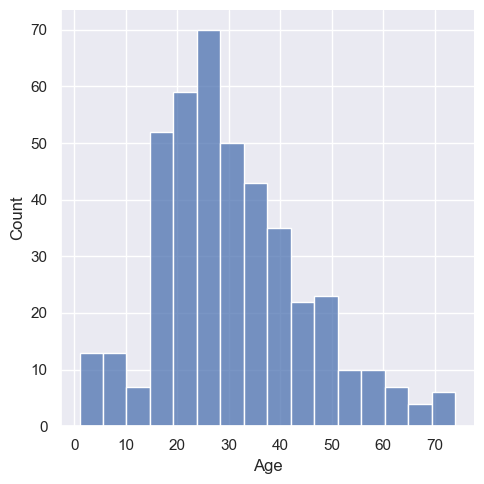

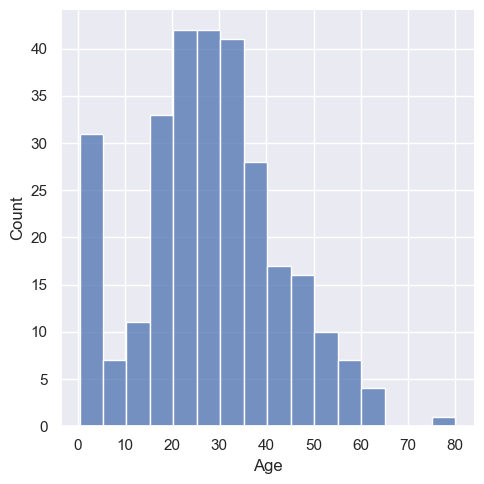

In [17]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df, x="Age", kde=True, bins = 5)
plt.show()
g = sns.FacetGrid(df, col='Survived')
g.map(sns.displot,'Age',kde=False)

/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


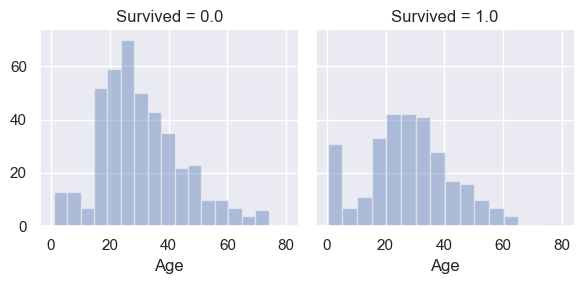

In [18]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


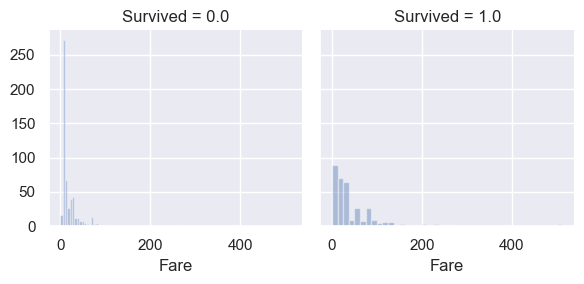

In [19]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


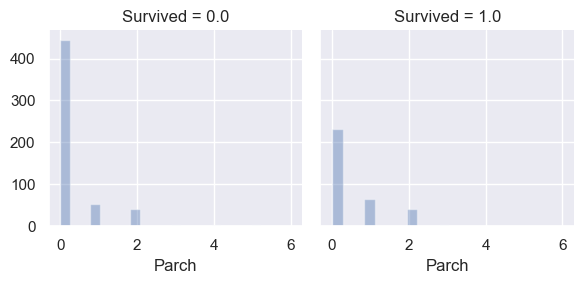

In [20]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


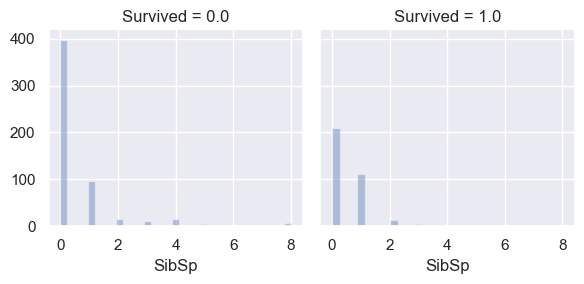

In [21]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

In [22]:
df['Family_Size'] = df['Parch'] + df['SibSp']

/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/robert/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


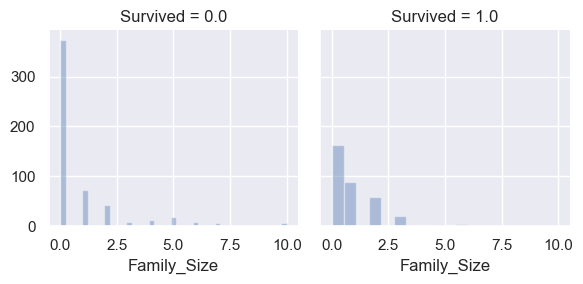

In [23]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

In [24]:
df['Title1'] = df['Name'].str.split(", ", expand=True)[1]

In [25]:
df['Name'].str.split(", ", expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [26]:
df['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [27]:
df['Title1'] = df['Title1'].str.split(".", expand=True)[0]

In [28]:
df['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [29]:
df['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [30]:
pd.crosstab(df['Title1'],df['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [31]:
pd.crosstab(df['Title1'],df['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.000000,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.000000,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [32]:
df.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [33]:
df.groupby(['Title1','Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [34]:
df['Title2'] = df['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [35]:
df['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [36]:
df.groupby(['Title2'])['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [37]:
df.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [38]:
pd.crosstab(df['Title2'],df['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [39]:
pd.crosstab(df['Title2'],df['Survived']).T.style.background_gradient(cmap='summer_r') 

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.000000,17,55,451,26
1.000000,23,130,87,102


In [40]:
list(df.groupby(['Title2','Pclass'])['Age'].mean().iteritems())[:3]

/var/folders/4t/yv8q1_017m726db87cx1327m0000gn/T/ipykernel_46849/2302031256.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  list(df.groupby(['Title2','Pclass'])['Age'].mean().iteritems())[:3]


[(('Master', 1), 6.984),
 (('Master', 2), 2.7572727272727273),
 (('Master', 3), 6.090000000000001)]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [42]:
df['Ticket']

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
5                   330877
6                    17463
7                   349909
8                   347742
9                   237736
10                 PP 9549
11                  113783
12               A/5. 2151
13                  347082
14                  350406
15                  248706
16                  382652
17                  244373
18                  345763
19                    2649
20                  239865
21                  248698
22                  330923
23                  113788
24                  349909
25                  347077
26                    2631
27                   19950
28                  330959
29                  349216
30                PC 17601
31                PC 17569
32                  335677
33              C.A. 24579
34                PC 17604
35                  113789
36                    2677
3

In [43]:
df['Ticket_info'] = df['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [44]:
df['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

<Axes: xlabel='Ticket_info', ylabel='count'>

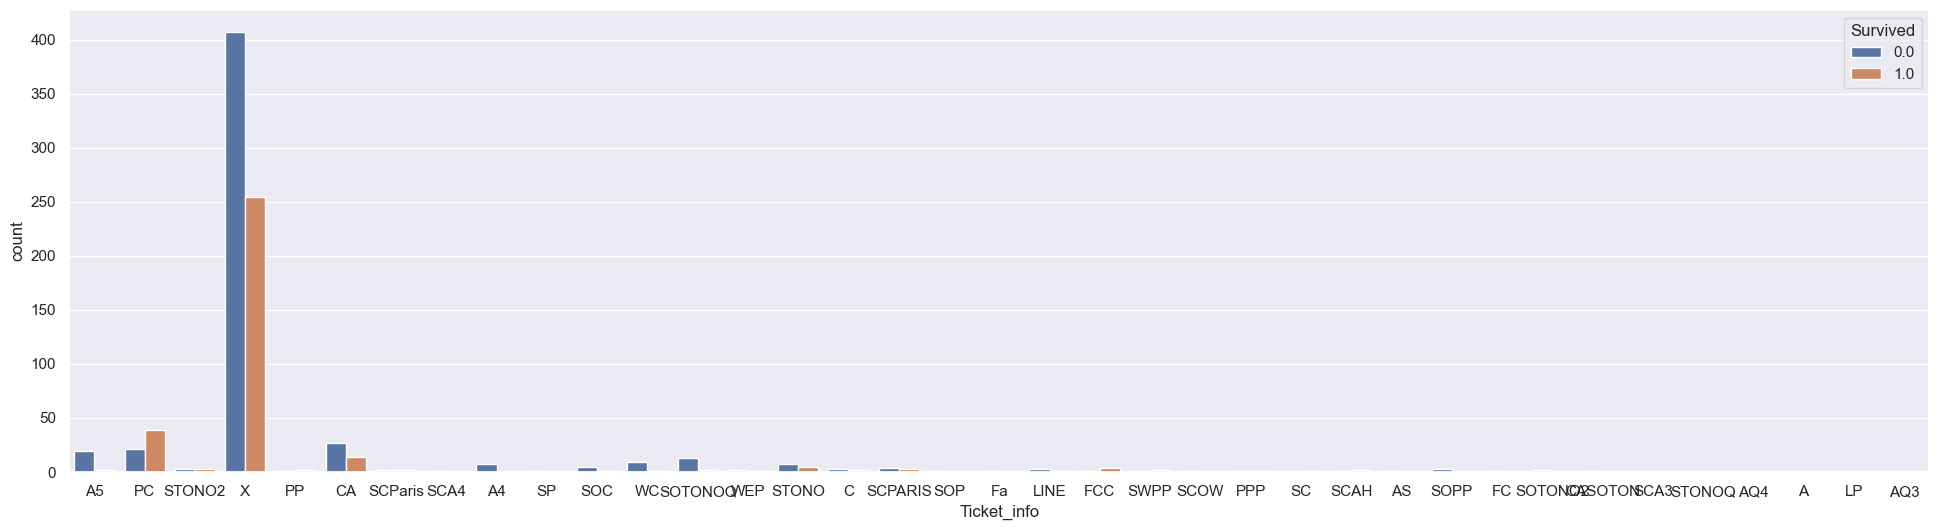

In [45]:
plt.figure(figsize=(24,6))
sns.countplot(data=df,x=df['Ticket_info'], hue=df['Survived'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


<Axes: xlabel='Embarked', ylabel='count'>

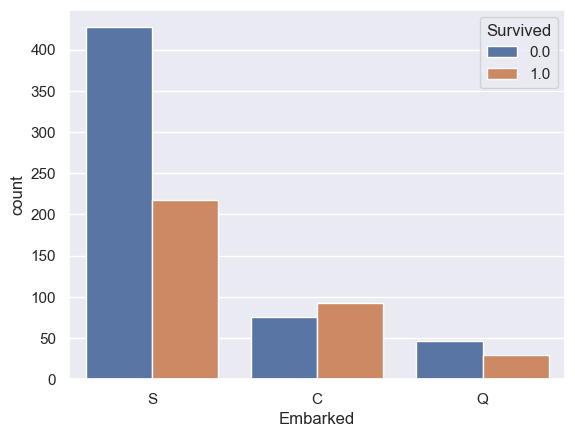

In [47]:
sns.countplot(data=df,x=df['Embarked'], hue=df['Survived'])

In [48]:
df['Embarked'] = df['Embarked'].fillna('s')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [50]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Family_Size  1309 non-null   int64  
 13  Title1       1309 non-null   object 
 14  Title2       1309 non-null   object 
 15  Ticket_info  1309 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 163.8+ KB


In [52]:
df['Cabin']

0                   NaN
1                   C85
2                   NaN
3                  C123
4                   NaN
5                   NaN
6                   E46
7                   NaN
8                   NaN
9                   NaN
10                   G6
11                 C103
12                  NaN
13                  NaN
14                  NaN
15                  NaN
16                  NaN
17                  NaN
18                  NaN
19                  NaN
20                  NaN
21                  D56
22                  NaN
23                   A6
24                  NaN
25                  NaN
26                  NaN
27          C23 C25 C27
28                  NaN
29                  NaN
30                  NaN
31                  B78
32                  NaN
33                  NaN
34                  NaN
35                  NaN
36                  NaN
37                  NaN
38                  NaN
39                  NaN
40                  NaN
41              

In [53]:
df["Cabin"] = df['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [54]:
df["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<Axes: xlabel='Cabin', ylabel='count'>

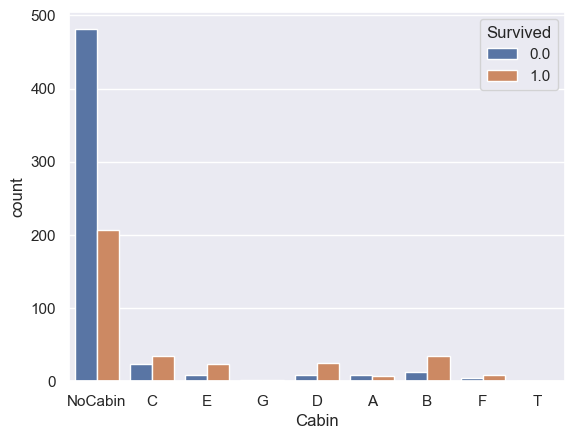

In [55]:
sns.countplot(data = df,x=df['Cabin'], hue=df['Survived'])

In [56]:
df['Embarked']

0       S
1       C
2       S
3       S
4       S
5       Q
6       S
7       S
8       S
9       C
10      S
11      S
12      S
13      S
14      S
15      S
16      Q
17      S
18      S
19      C
20      S
21      S
22      Q
23      S
24      S
25      S
26      C
27      S
28      Q
29      S
30      C
31      C
32      Q
33      S
34      C
35      S
36      C
37      S
38      S
39      C
40      S
41      S
42      C
43      C
44      Q
45      S
46      Q
47      Q
48      C
49      S
50      S
51      S
52      C
53      S
54      C
55      S
56      S
57      C
58      S
59      S
60      C
61      s
62      S
63      S
64      C
65      C
66      S
67      S
68      S
69      S
70      S
71      S
72      S
73      C
74      S
75      S
76      S
77      S
78      S
79      S
80      S
81      S
82      Q
83      S
84      S
85      S
86      S
87      S
88      S
89      S
90      S
91      S
92      S
93      S
94      S
95      S
96      C
97      C
98      S
99      S


In [57]:
df['Sex'] = df['Sex'].astype('category').cat.codes
df['Embarked'] = df['Embarked'].astype('category').cat.codes
df['Pclass'] = df['Pclass'].astype('category').cat.codes
df['Title1'] = df['Title1'].astype('category').cat.codes
df['Title2'] = df['Title2'].astype('category').cat.codes
df['Cabin'] = df['Cabin'].astype('category').cat.codes
df['Ticket_info'] = df['Ticket_info'].astype('category').cat.codes

In [58]:
df['Embarked']

0       2
1       0
2       2
3       2
4       2
5       1
6       2
7       2
8       2
9       0
10      2
11      2
12      2
13      2
14      2
15      2
16      1
17      2
18      2
19      0
20      2
21      2
22      1
23      2
24      2
25      2
26      0
27      2
28      1
29      2
30      0
31      0
32      1
33      2
34      0
35      2
36      0
37      2
38      2
39      0
40      2
41      2
42      0
43      0
44      1
45      2
46      1
47      1
48      0
49      2
50      2
51      2
52      0
53      2
54      0
55      2
56      2
57      0
58      2
59      2
60      0
61      3
62      2
63      2
64      0
65      0
66      2
67      2
68      2
69      2
70      2
71      2
72      2
73      0
74      2
75      2
76      2
77      2
78      2
79      2
80      2
81      2
82      1
83      2
84      2
85      2
86      2
87      2
88      2
89      2
90      2
91      2
92      2
93      2
94      2
95      2
96      0
97      0
98      2
99      2


In [59]:
dfAgeNull = df[df["Age"].isnull()]
dfAgeNotNull = df[df["Age"].notnull()]
remove_outlier = dfAgeNotNull[(np.abs(dfAgeNotNull["Fare"]-dfAgeNotNull["Fare"].mean())>(4*dfAgeNotNull["Fare"].std()))|
                      (np.abs(dfAgeNotNull["Family_Size"]-dfAgeNotNull["Family_Size"].mean())>(4*dfAgeNotNull["Family_Size"].std()))]

rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dfAgeNull[ageColumns])
dfAgeNull.loc[:,"Age"] = ageNullValues
df = dfAgeNull.append(dfAgeNotNull)
df.reset_index(inplace=True, drop=True)

/var/folders/4t/yv8q1_017m726db87cx1327m0000gn/T/ipykernel_46849/4149991781.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dfAgeNull.append(dfAgeNotNull)


In [60]:
dfTrain = df[pd.notnull(df['Survived'])].sort_values(by=["PassengerId"])
dfTest = df[~pd.notnull(df['Survived'])].sort_values(by=["PassengerId"])

In [61]:
dfTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [62]:
dfTrain = dfTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dfTest = dfTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [63]:
dfTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.000000,2,7.2500,2,1,1,2,2,7
264,1.0,38.000000,0,71.2833,0,0,1,3,14,2
265,1.0,26.000000,2,7.9250,2,0,0,1,31,7
266,1.0,35.000000,2,53.1000,0,0,1,3,36,2
267,0.0,35.000000,2,8.0500,2,1,0,2,36,7
0,0.0,41.326267,1,8.4583,2,1,0,2,36,7
268,0.0,54.000000,2,51.8625,0,1,0,2,36,4
269,0.0,2.000000,2,21.0750,2,1,4,0,36,7
270,1.0,27.000000,2,11.1333,2,0,2,3,36,7
271,1.0,14.000000,0,30.0708,1,0,1,3,36,7


In [64]:
rf = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16, 20], "n_estimators": [50, 100, 400, 700, 1000]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(dfTrain.iloc[:, 1:], dfTrain.iloc[:, 0])

print(gs.best_score_)
print(gs.best_params_) 

0.8294051627384961
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 50}


In [65]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dfTrain.iloc[:, 1:], dfTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8305


In [66]:
pd.concat((pd.DataFrame(dfTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.265756
2,Fare,0.164192
6,Title2,0.152290
0,Age,0.131313
3,Pclass,0.090896
5,Family_Size,0.070874
8,Cabin,0.067064
7,Ticket_info,0.031869
1,Embarked,0.025746


In [67]:
rf_res =  rf.predict(dfTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

In [68]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
